In [111]:
import yfinance as yf
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

In [73]:
#Extracting Tesla Stock Data Using yfinance
tesla = yf.Ticker("TSLA")

In [74]:
data_tesla = tesla.history(period="max")

In [101]:
data_tesla

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0
...,...,...,...,...,...,...,...
2023-03-13 00:00:00-04:00,167.460007,177.350006,163.910004,174.479996,167790300,0.0,0.0
2023-03-14 00:00:00-04:00,177.309998,183.800003,177.139999,183.259995,143717900,0.0,0.0
2023-03-15 00:00:00-04:00,180.800003,182.339996,176.029999,180.449997,145995600,0.0,0.0


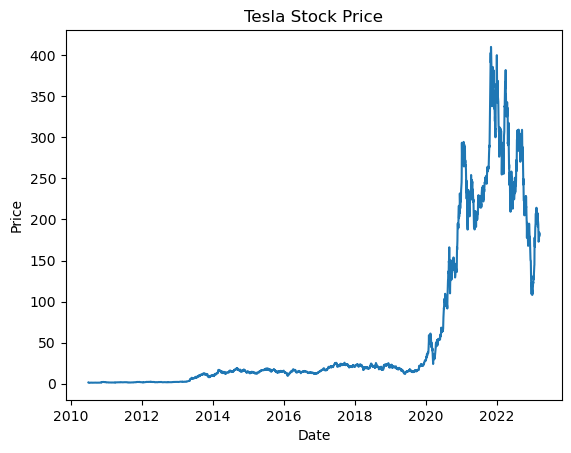

In [78]:
# Plot the closing prices
plt.plot(data_tesla['Close'])
plt.title("Tesla Stock Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

In [28]:
#Extracting Tesla Revenue Data Using Webscraping
url_tesla = " https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
response_tesla = requests.get(url_tesla).text

In [29]:
soup_tesla = BeautifulSoup(response_tesla, 'html5lib')

In [30]:
table_tesla = soup_tesla.find_all('table')

In [34]:
for index,table in enumerate(table_tesla):
    if ("Tesla Quarterly Revenue" in str(table)):
        table_index = index
revenue_tesla = pd.DataFrame(columns=["Date", "Revenue"])
for row in table_tesla[table_index].tbody.find_all("tr"):
    col = row.find_all("td")
    if (col != []):
        Date = col[0].text
        Revenue = col[1].text.replace("$", "").replace(",", "")
        revenue_tesla = revenue_tesla.append({"Date":Date, "Revenue":Revenue}, ignore_index=True)

C:\Users\yunze\AppData\Local\Temp\ipykernel_3372\1333483372.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  revenue_tesla = revenue_tesla.append({"Date":Date, "Revenue":Revenue}, ignore_index=True)
C:\Users\yunze\AppData\Local\Temp\ipykernel_3372\1333483372.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  revenue_tesla = revenue_tesla.append({"Date":Date, "Revenue":Revenue}, ignore_index=True)
C:\Users\yunze\AppData\Local\Temp\ipykernel_3372\1333483372.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  revenue_tesla = revenue_tesla.append({"Date":Date, "Revenue":Revenue}, ignore_index=True)
C:\Users\yunze\AppData\Local\Temp\ipykernel_3372\1333483372.py:10: FutureWarning: The frame.append method is deprecated and 

In [40]:

revenue_tesla = revenue_tesla[revenue_tesla['Revenue'] != ""]

In [43]:
revenue_tesla['Date'] = pd.to_datetime(revenue_tesla['Date'])

In [47]:
revenue_tesla['Revenue'] = revenue_tesla['Revenue'].astype(int)

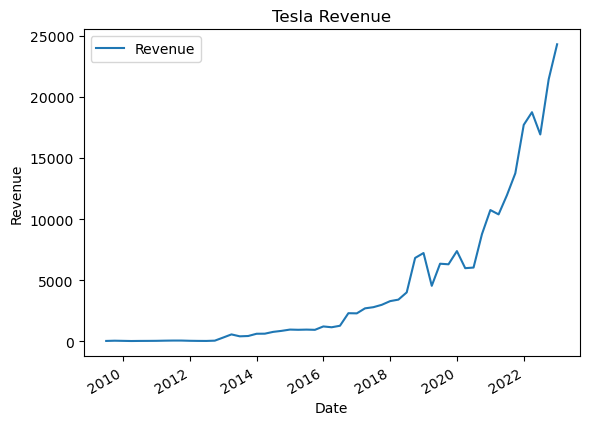

In [48]:
# Plot the closing prices
revenue_tesla.plot(x='Date',y='Revenue',kind='line')
plt.title("Tesla Revenue")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.show()

In [79]:
#Extracting GameStop Stock Data Using yfinance
gameStop = yf.Ticker("GME")

In [80]:
data_gs = gameStop.history(period="max")

In [81]:
data_gs.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


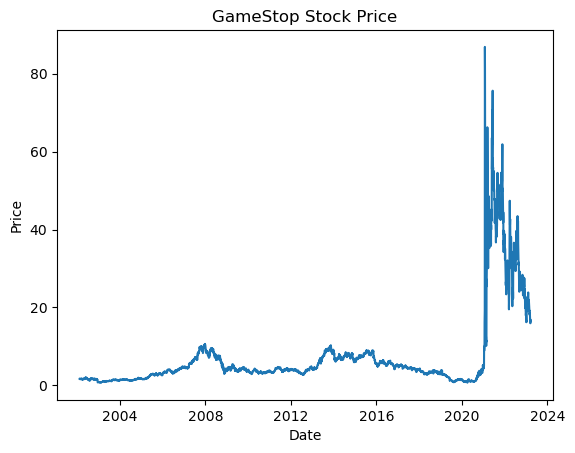

In [87]:
# Plot the closing prices
plt.plot(data_gs['Close'])
plt.title("GameStop Stock Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

In [83]:
#Extracting GameStop Revenue Data Using Webscraping
url_gs = " https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
response_gs = requests.get(url_gs).text

In [84]:
soup_gs = BeautifulSoup(response_gs, 'html5lib')

In [85]:
table_gs = soup_gs.find_all('table')

In [86]:
for index,table in enumerate(table_gs):
    if ("Tesla Quarterly Revenue" in str(table)):
        table_index = index
revenue_gs = pd.DataFrame(columns=["Date", "Revenue"])
for row in table_tesla[table_index].tbody.find_all("tr"):
    col = row.find_all("td")
    if (col != []):
        Date = col[0].text
        Revenue = col[1].text.replace("$", "").replace(",", "")
        revenue_gs = revenue_gs.append({"Date":Date, "Revenue":Revenue}, ignore_index=True)

C:\Users\yunze\AppData\Local\Temp\ipykernel_3372\1969373303.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  revenue_gs = revenue_gs.append({"Date":Date, "Revenue":Revenue}, ignore_index=True)
C:\Users\yunze\AppData\Local\Temp\ipykernel_3372\1969373303.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  revenue_gs = revenue_gs.append({"Date":Date, "Revenue":Revenue}, ignore_index=True)
C:\Users\yunze\AppData\Local\Temp\ipykernel_3372\1969373303.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  revenue_gs = revenue_gs.append({"Date":Date, "Revenue":Revenue}, ignore_index=True)
C:\Users\yunze\AppData\Local\Temp\ipykernel_3372\1969373303.py:10: FutureWarning: The frame.append method is deprecated and will be removed fr

In [88]:

revenue_gs = revenue_gs[revenue_gs['Revenue'] != ""]
revenue_gs['Revenue'] = revenue_gs['Revenue'].astype(int)

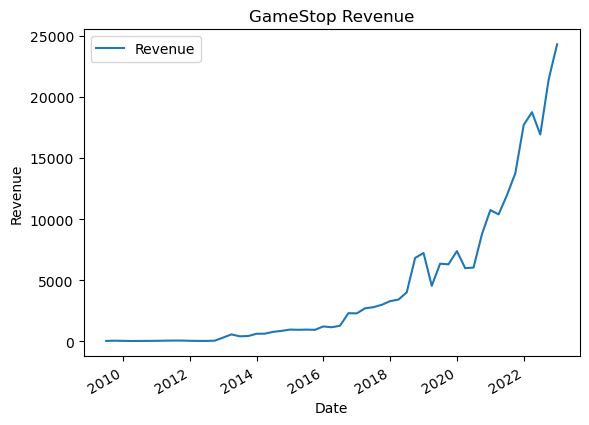

In [89]:
# Plot the closing prices
revenue_tesla.plot(x='Date',y='Revenue',kind='line')
plt.title("GameStop Revenue")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.show()

In [115]:
revenue_tesla= revenue_tesla.iloc[::-1]

In [126]:
#Tesla Stock and Revenue Dashboard

# Create a figure with two subplots
fig = make_subplots(rows=1, cols=2)
# Add Tesla's stock price data to the first subplot
fig.add_trace(
    go.Scatter(x=data_tesla.index, y=data_tesla['Close'], name='Stock Price'),
    row=1, col=1
)

# Add Tesla's revenue data to the second subplot
fig.add_trace(
    go.Scatter(x=revenue_tesla['Date'], y=revenue_tesla['Revenue'], name='Revenue'),
    row=1, col=2
)

# Customize the dashboard layout
fig.update_layout(title='Tesla Stock Price and Revenue Dashboard',
                  xaxis_title='Date',
                  yaxis_title='Price/Revenue',
                  legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01))

fig.show()

In [128]:
#GameStop Stock and Revenue Dashboard

# Create a figure with two subplots
fig = make_subplots(rows=1, cols=2)
# Add GameStop's stock price data to the first subplot
fig.add_trace(
    go.Scatter(x=data_gs.index, y=data_gs['Close'], name='Stock Price'),
    row=1, col=1
)

# Add GameStop's revenue data to the second subplot
fig.add_trace(
    go.Scatter(x=revenue_gs['Date'], y=revenue_gs['Revenue'], name='Revenue'),
    row=1, col=2
)

# Customize the dashboard layout
fig.update_layout(title='GameStop Stock Price and Revenue Dashboard',
                  xaxis_title='Date',
                  yaxis_title='Price/Revenue',
                  legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01))

fig.show()